<a href="https://colab.research.google.com/github/Pratap8810/CS6910/blob/main/Assignment-1/Fn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 143 kB 59.1 MB/s 
     |████████████████████████████████| 180 kB 59.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=939755534b449800e8f48a83489185d98791aa06e4179bfef2f2cd061ddf93ef
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
from  matplotlib import pyplot as plt
import time
import math
#import wandb

In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb.init(project="assignment1")

wandb: Currently logged in as: pratap101 (use `wandb login --relogin` to force relogin)


In [ ]:
((xtrain, ytrain), (xtest, ytest)) = fashion_mnist.load_data()
items=["T-shirt/top", "Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag","Ankle boot"]

4431872/4422102 [==============================] - 0s 0us/step


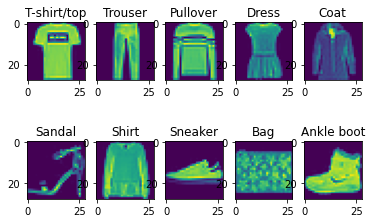

In [ ]:
ig=[]
for i in range(10):
  for j in range(len(ytrain)):
    if ytrain[j]==i:
      ig.append(xtrain[j])
      break;

for i in range(len(ig)):
  plt.subplot(2,5,i+1)
  plt.imshow(ig[i])
  plt.title(items[i])
#wandb.log({"imagess":[wandb.Image(img,caption=item) for img,item in zip(ig,items)]})
# print(items[i])
#plt.show()
# wandb.finish()

In [ ]:
ftrx=np.zeros((60000,784))
ftry=np.zeros((60000,10))
ftex=np.zeros((10000,784))
ftey=np.zeros((10000,10))

In [ ]:
for i in range(len(xtrain)):
  ftrx[i]=xtrain[i].flatten();
  ftrx[i]=ftrx[i]/255
  ftry[i][ytrain[i]]=1
for i in range(len(xtest)):
  ftex[i]=xtest[i].flatten();
  ftex[i]=ftex[i]/255
  ftey[i][ytest[i]]=1

In [ ]:
ftey[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#xtrain = xtrain.reshape(60000, 784)/256
#xtest = xtest.reshape(10000, 784)/256
a=np.zeros(10)
a=[2,1,0,0,0]
np.argmax(a)

0

10


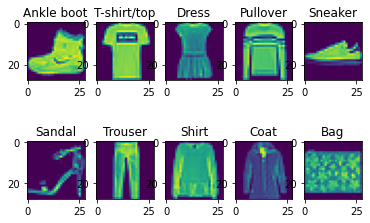

In [ ]:
uniqueData={}
for i in range(len(xtrain)):
  label=items[np.argmax(ftry[i])]
  if label not in uniqueData:
    uniqueData[label]=xtrain[i]
number=0
print(len(uniqueData))
for i in uniqueData:
    plt.subplot(2,5,number+1)
    plt.imshow(uniqueData[i])
    plt.title(i)
    number+=1

In [ ]:
def sigmoid(x):
  return np.where(x>=0, 1/(1+np.exp(-x)), np.exp(x)/(1+np.exp(x)))

def grad_sigmoid(z):
  d=sigmoid(z)
  return d*(1-d)

def softmax(z):
  mx=np.max(z)
  z=z-mx
  out=np.exp(z)/np.sum(np.exp(z)+1e-9)
  return out

def grad_softmax(yh,ty):
  return yh-ty

def Relu(x):
    return np.maximum(0, x)

def grad_Relu(x):
    return [1 if xi>0 else 0 for xi in x]

def Tanh(Z):
    mx=np.max(Z)
    #numr = np.exp(x-mx) - np.exp(-x-mx)
    #denom=np.exp(x-mx) + np.exp(-x-mx)
    #mn=np.min(Z)
    # if mn<0:
    #   a=np.exp(Z-mx+mn)
    #   b=np.exp(-Z-mx+mn)
      
    #   #return (a-b+1e-9)/(a+b+1e-8)
    return np.array([((np.exp(x-mx) - np.exp(-x-mx))/((np.exp(x-mx) + np.exp(-x-mx)))) for x in Z])

def grad_Tanh(x):
    return 1-Tanh(x)**2

def InitParams(x,init):
    weights=[]
    baises=[]
    if(init=='random'):
      weights.append((np.random.randn(x[0],784)))
      baises.append((np.random.randn(x[0])))
      l=len(x)-1
      for i in range(l):
          weights.append(0.1*(np.random.randn(x[i+1],x[i])))
          baises.append(0.1*(np.random.randn(x[i+1])))
      weights.append(0.1*(np.random.randn(10,x[-1])))
      baises.append(0.1*(np.random.randn(10)))
    else:
      weights.append(np.random.randn(x[0], 784)*np.sqrt(2./(x[0] + 784)))
      baises.append(np.zeros(x[0]))
      l=len(x)-1
      for i in range(l):
          weights.append(np.random.randn(x[i], x[i-1])*np.sqrt(2./(x[i] + x[i-1])))
          baises.append(np.zeros(x[i+1]))
      weights.append(np.sqrt(2./(10 + x[-1]))*(np.random.randn(10,x[-1])))
      baises.append((np.zeros(10)))


    return weights,baises

def Feed_Frwd_Nw1(xTr,Weighs,Bais,activation,loss):
  a_i=[]
  h_i=[]
  output=np.arange(10,dtype='float64')
  a_i.append(np.dot(Weighs[0],xTr)+Bais[0])       
  if (activation=='sig'):
    h_i.append(sigmoid(a_i[0]))
  elif (activation=='tanh'):
    h_i.append(Tanh(a_i[0]))
  elif (activation=='relu'):
    h_i.append(Relu(a_i[0]))
  for i in range(1,len(Weighs)-1):
    a_i.append((np.dot(Weighs[i],h_i[i-1])+Bais[i]))
    if (activation=='sig'):
      h_i.append(sigmoid(a_i[i]))
    elif (activation=='tanh'):
      h_i.append(Tanh(a_i[i]))
    elif (activation=='relu'):
      h_i.append(Relu(a_i[i]))
  a_i.append(np.dot(Weighs[-1],h_i[-1])+Bais[-1])
  if (loss=='ce'):
    h_i.append(softmax(a_i[-1]))
  elif (loss=='mse'):
    h_i.append(sigmoid(a_i[-1]))
  yp=h_i[-1]
  return yp,a_i,h_i

def initgrads(N,Nunits):
  dh,da,dw,db=[],[],[],[]
  dw.append(np.zeros((Nunits[0],784)))
  db.append(np.zeros(Nunits[0]))
  da.append(np.zeros(Nunits[0]))
  dh.append(np.zeros(Nunits[0]))
  for i in range(1,N):
    dw.append(np.zeros((Nunits[i],Nunits[i-1])))
    db.append(np.zeros(Nunits[i]))
    da.append(np.zeros(Nunits[i]))
    dh.append(np.zeros(Nunits[i]))
  dw.append(np.zeros((10,Nunits[-1])))
  db.append(np.zeros(10))
  da.append(np.zeros(10))
  dh.append(np.zeros(10))
  return dw,db,da,dh

def Back_Prop(ip,ypr,ty,a_i,h_i,W,B,N,nrl,activation,Loss):
  k=len(ypr)
  dw,db,da,dh=initgrads(N,nrl)
  if (Loss=="ce"):
    dh[-1]=-(ty/ypr)
    da[-1]=ypr-ty
  elif (Loss=="mse"):
    dh[-1]=2*(ypr-ty)
    da[-1]=dh[-1]*grad_sigmoid(ypr)

  db[-1]=da[-1] 
  dw[-1]=np.dot((da[-1][:,np.newaxis]),(h_i[-2][:,np.newaxis]).T)
 
  for i in range(N-1,-1,-1):
    dh[i]=np.squeeze(np.dot(W[i+1].T,da[i+1]))

    if (activation=='sig'):
      da[i]=dh[i]*grad_sigmoid(a_i[i])
    elif (activation=='tanh'):
      da[i]=dh[i]*grad_Tanh(a_i[i])
    elif (activation=='relu'):
      da[i]=dh[i]*grad_Relu(a_i[i])
    db[i]=np.copy(da[i])
    if (i==0):
      dw[i]=np.dot(da[i][:,np.newaxis],ip[:,np.newaxis].T)
    else:
      dw[i]=np.dot(da[i][:,np.newaxis],h_i[i-1][:,np.newaxis].T)
  return dw,db,da,dh

def gradDecent_v3(ftrx,ftry,init,wd,eta,N,nrl,activation,Ls_fun,epochs,batchsize):
  W,B=InitParams(nrl,init)
  z1,z2=W,B
  while(epochs>0):
    start = time.time()
    epochs-=1
    loss=0
    uw,ub,_,_=initgrads(N,nrl)
    count=0
    for i in range(len(ftrx[:1000])):
      pred_y,ai,hi=Feed_Frwd_Nw1(ftrx[i],W,B,activation,Ls_fun)
      gw,gb,ga,gh=Back_Prop(ftrx[i],pred_y,ftry[i],ai,hi,W,B,N,nrl,activation,Ls_fun)
      # print(gw[0])
      loss=loss+loss_cal(pred_y,ftry[i],Ls_fun)
      for j in range(len(gw)):
        uw[j]=np.add(uw[j],gw[j])
        ub[j]=np.add(ub[j],gb[j])
      if((i-1)%batchsize==0):
        for j in range(len(gw)):
          uw[j]/=batchsize
          ub[j]/=batchsize
        for k in range(len(gw)):
          z1[k],z2[k]=W[k],B[k]
          W[k]=(1-wd*eta)*W[k]-eta*uw[k]
          B[k]=(1-wd*eta)*B[k]-eta*ub[k]
          # print(np.array_equal(z1[k],W[k]),np.array_equal(z2[k],B[k]))
        acc=accuracy(W,B)
        testloss=val_loss(activation,Ls_fun)
        loss/=batchsize
        count/=batchsize
        wandb.log({"val_loss":loss/batchsize,"val_accuracy":count/batchsize,"loss":testloss,"Accuray":acc,"epochs":epochs})
        count=0
      # print(np.array_equal(W[k],z1),np.array_equal(B[k],z2))    
    end = time.time()  
    print("epochs   :",epochs,"   val_loss   :",loss/1000,"  val_acc:",count,"loss:",testloss,"Accuracy:",acc,"    time:",math.ceil(end-start))
    
  return hi,W,B





In [ ]:
def gradDecent_v2(ftrx,ftry,init,wd,eta,N,nrl,activation,Ls_fun,epochs,batchsize):
  W,B=InitParams(nrl,init)
  z1,z2=W,B
  e=0
  while(epochs>0):
    e+=1
    start = time.time()
    epochs-=1
    loss=0
    LOSS=0
    uw,ub,_,_=initgrads(N,nrl)
    acc1=0
    count=0
    for i in range(len(ftrx[6000:])):
      pred_y,ai,hi=Feed_Frwd_Nw1(ftrx[i],W,B,activation,Ls_fun)
      gw,gb,ga,gh=Back_Prop(ftrx[i],pred_y,ftry[i],ai,hi,W,B,N,nrl,activation,Ls_fun)
      # print(gw[0])
      l=loss_cal(pred_y,ftry[i],Ls_fun)
      LOSS+=l
      acc1+=accr(W,B,i,pred_y)
      for j in range(len(gw)):
        uw[j]=np.add(uw[j],gw[j])
        ub[j]=np.add(ub[j],gb[j])
      if((i+1)%batchsize==0):
        # for j in range(len(gw)):
        #   uw[j]/=batchsize
        #   ub[j]/=batchsize
        #print(uw)
        for k in range(len(gw)):
          z1[k],z2[k]=W[k],B[k]
          W[k]=np.subtract(W[k],eta*uw[k])
          B[k]=np.subtract(B[k],eta*ub[k])
          uw[k]=np.subtract(uw[k],uw[k])
          ub[k]=np.subtract(ub[k],ub[k])
          # print(np.array_equal(z1[k],W[k]),np.array_equal(z2[k],B[k]))
  
        #wandb.log({"val_loss":loss/batchsize,"val_accuracy":count/batchsize,"loss":testloss,"Accuray":acc,"epochs":epochs})     
        count=0
        loss=0
        #uw,ub,_,_=initgrads(N,nrl)
      # print(np.array_equal(W[k],z1),np.array_equal(B[k],z2))    
    end = time.time() 
    testloss=val_loss(W,B,activation,Ls_fun)
    testacc=accuracy(W,B,activation,Ls_fun)
    #wandb.log({"epoch":e,"Train_loss":LOSS/len(ftrx),"Train_acc":acc1/len(ftrx),"val_loss":testloss,"val_Accuracy":testacc})
    print("epochs :",e,"train_loss :",LOSS/len(ftrx),"  Train_acc:",acc1/len(ftrx),"val_loss:",testloss,"val_Accuracy:",testacc,"    time:",math.ceil(end-start))
  #test_acc(W,B,activation,Ls_fun)  
  return hi,W,B

In [ ]:
wandb.finish()

AttributeError: ignored

In [ ]:
def loss_cal(yh,ay,ls_fun):
  if (ls_fun=='ce'):
    cost = -np.sum(np.multiply(ay,np.log(yh)))
    return cost
    #return np.sum(ay.multiply(np.log(yh)))
  elif (ls_fun=='mse'):
    return np.sum((ay-yh)**2)

In [ ]:
ftey[1]

array([0., 1., 1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ytest[1]

2

In [ ]:
a=[1,2,3]
b=[2,3,4]
np.multiply(a,b)

array([ 2,  6, 12])

In [ ]:
def val_loss(W,B,activation,ls_fun):
  cost=0
  if (ls_fun=='ce'):
    for i in range(len(ftex)):
      ypr,_,_=Feed_Frwd_Nw1(ftex[i],W,B,activation,ls_fun)
      cost = np.sum(np.multiply(ftey[i],np.log(ypr)))
    return -cost/len(ftex)
    #return np.sum(ay.multiply(np.log(yh)))
  elif (ls_fun=='mse'):
    for i in range(len(ftex)):
      ypr,_,_=Feed_Frwd_Nw1(ftex[i],W,B,activation,ls_fun)
      cost+=np.sum((ytest[i]- ypr)**2)
    return cost/len(ftex)
  


In [ ]:
def test_acc(W,B,activation,ls_fun):
  count=0
  predictions=[]
  matrix=np.zeros((10,10))
  if (ls_fun=='ce'):
    for i in range(len(ftex)):
      ypr,_,_=Feed_Frwd_Nw1(ftex[i],W,B,activation,ls_fun)
      if (np.argmax(ypr) == ytest[i]):
        count+=1
      predictions.append(np.argmax(ypr))
      matrix[np.argmax(ypr)][ytest[i]]+=1
  lables={}
  for i in range(len(items)):
    lables[i]=items[i]
  wandb.log({"confusion matrix": wandb.plot.confusion_matrix(probs=None,
                                                              y_true=ytest,
                                                              preds=predictions,
                                                              class_names=items)})
  wandb.log({"confusion matrix v2.0": wandb.plots.HeatMap(items, items, matrix, show_text=True)})
  return count/len(ytest)

In [ ]:
def accr(W,B,i,ypr):
  if (np.argmax(ypr) ==np.argmax(ftry[i])):
    return 1
  return 0

In [ ]:
def accuracy(W,B,activation,ls_fun):
  count=0
  for i in range(len(ftex)):
    ypr,_,_=Feed_Frwd_Nw1(ftex[i],W,B,activation,ls_fun)
    if (np.argmax(ypr) ==ytest[i]):
      count+=1
  return count/len(ytest)

In [ ]:
# nrl=[70,30,15]
nrl=[128] # number of neurons in each hidden layer
N=len(nrl)
W,B=InitParams(nrl,'xaviour')
dw,db,da,dh=initgrads(N,nrl)
# ypr,ai,hi=Feed_Frwd_Nw1(ftrx[2],N,nrl,W,B)

In [ ]:
a,b,c=gradDecent_v2(ftrx,ftry,'random',0.5,0.1,N,nrl,'tanh','ce',7,1)

epochs : 1 train_loss : 5.053562716087683   Train_acc: 0.4409 val_loss: 0.0007015344000559092 val_Accuracy: 0.5676     time: 283
epochs : 2 train_loss : 4.828212488478748   Train_acc: 0.49388333333333334 val_loss: 0.000983442292994753 val_Accuracy: 0.4994     time: 283


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


epochs : 3 train_loss : nan   Train_acc: 0.2931 val_loss: nan val_Accuracy: 0.1     time: 286
epochs : 4 train_loss : nan   Train_acc: 0.0895 val_loss: nan val_Accuracy: 0.1     time: 287
epochs : 5 train_loss : nan   Train_acc: 0.0895 val_loss: nan val_Accuracy: 0.1     time: 281
epochs : 6 train_loss : nan   Train_acc: 0.0895 val_loss: nan val_Accuracy: 0.1     time: 294
epochs : 7 train_loss : nan   Train_acc: 0.0895 val_loss: nan val_Accuracy: 0.1     time: 294


In [ ]:
test_acc(b,c,'sig','ce')

wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.
wandb: Visualizing heatmap.


0.8292

In [ ]:
p_y,ai,hi=Feed_Frwd_Nw1(ftrx[1],W,B,'sig','ce')

In [ ]:
gw,gb,ga,gh=Back_Prop(ftrx[1],p_y,ftry[1],ai,hi,W,B,N,nrl,'sig','ce')

In [ ]:
for i in range(len(gh)):
  print(gw[i].shape)

(32, 784)
(32, 32)
(32, 32)
(10, 32)


In [ ]:
def loss(fin_ans, y_train, loss_func, ii, num_output):
    if loss_func == "cross_entropy":
        return -np.log(fin_ans[y_train[ii]])
    elif loss_func == "squared_error":
        return np.square(fin_ans - e(y_train[ii], num_output))

In [ ]:
import copy 
def Momentum(ftrx,ftry,init,batchsize,gamma,eta,N,nrl,activation,Ls_fun,epochs=1):
  W,B=InitParams(nrl,init)
  vw,vb,_,_=initgrads(N,nrl)
  pw,pb,_,_=initgrads(N,nrl)
  e=0
  while(epochs>0):
    start = time.time()
    e+=1
    epochs-=1
    loss=0
    LOSS=0
    count=0
    acc1=0  
    uw,ub,_,_=initgrads(N,nrl)
    for i in range(len(ftrx)):
      pred_y,ai,hi=Feed_Frwd_Nw1(ftrx[i],W,B,activation,Ls_fun) 
      gw,gb,ga,gh=Back_Prop(ftrx[i],pred_y,ftry[i],ai,hi,W,B,N,nrl,activation,Ls_fun)
      l=loss_cal(pred_y,ftry[i],Ls_fun)
      LOSS+=l
      acc1+=accr(W,B,i,pred_y)
      for j in range(len(gw)):
        uw[j]=np.add(uw[j],gw[j])
        ub[j]=np.add(ub[j],gb[j])
      if((i+1)%batchsize==0):
        for k in range(len(gw)):
          # z1,z2=W[k],B[k]
          vw[k]=np.add(gamma*pw[k],eta*uw[k]/batchsize)
          vb[k]=np.add(gamma*pb[k],eta*ub[k]/batchsize)
          W[k]=np.subtract(W[k],vw[k])
          B[k]=np.subtract(B[k],vb[k])
          pw[k]=copy.deepcopy(vw[k])
          pb[k]=copy.deepcopy(vb[k])
          uw[k]=np.subtract(uw[k],uw[k])
          ub[k]=np.subtract(ub[k],ub[k])
          
        loss/=batchsize
        count/=batchsize
        #wandb.log({"val_loss":loss/batchsize,"val_accuracy":count/batchsize,"loss":testloss,"Accuray":acc,"epochs":epochs})
        count=0
      # print(np.array_equal(W[k],z1),np.array_equal(B[k],z2))    
    end = time.time() 
    testloss=val_loss(W,B,activation,Ls_fun)
    testacc=accuracy(W,B) 
    #wandb.log({"epoch":e,"Train_loss":LOSS/len(ftrx),"Train_acc":acc1/len(ftrx),"val_loss":testloss,"val_Accuracy":testacc})
    print("epochs   :",e,"train_loss :",LOSS/len(ftrx),"  Train_acc:",acc1/len(ftrx),"val_loss:",testloss,"val_Accuracy:",testacc,"    time:",math.ceil(end-start))
    #pw[k]=np.subtract(pw[k],pw[k])
    #pb[k]=np.subtract(pb[k],pb[k])
  test_acc(W,B,activation,Ls_fun)  
  return hi,W,B

In [ ]:
hi,W,B=Momentum(ftrx,ftry,'xaviour',32,0.9,0.1,N,nrl,'sig','ce',10)

epochs   : 1 train_loss : 0.778138181615572   Train_acc: 0.70125 val_loss: 5.4055986094071695e-06 val_Accuracy: 0.8293     time: 33


KeyboardInterrupt: ignored

In [ ]:
import copy 
def Nesterov(ftrx,ftry,init,batchsize,gamma,eta,N,nrl,activation,Ls_fun,epochs=1):
  W,B=InitParams(nrl,init)
  vw,vb,_,_=initgrads(N,nrl)
  pw,pb,_,_=initgrads(N,nrl)
  w,b=copy.deepcopy(W),copy.deepcopy(B)
  e=0
  while(epochs>0):
    start = time.time()
    e+=1
    epochs-=1
    loss=0
    LOSS=0
    count=0
    acc1=0
    
    uw,ub,_,_=initgrads(N,nrl)
    for i in range(len(ftrx)):
      pred_y,ai,hi=Feed_Frwd_Nw1(ftrx[i],W,B,activation,Ls_fun) 
      gw,gb,ga,gh=Back_Prop(ftrx[i],pred_y,ftry[i],ai,hi,w,b,N,nrl,activation,Ls_fun)
      l=loss_cal(pred_y,ftry[i],Ls_fun)
      LOSS+=l
      acc1+=accr(W,B,i,pred_y)
      for j in range(len(gw)):
        uw[j]=np.add(uw[j],gw[j])
        ub[j]=np.add(ub[j],gb[j])
      if((i+1)%batchsize==0):
        for k in range(len(gw)):
          # z1,z2=W[k],B[k]
          vw[k]=np.add(gamma*pw[k],eta*uw[k]/batchsize)
          vb[k]=np.add(gamma*pb[k],eta*ub[k]/batchsize)
          W[k]=np.subtract(W[k],vw[k])
          B[k]=np.subtract(B[k],vb[k])
          pw[k]=copy.deepcopy(vw[k])
          pb[k]=copy.deepcopy(vb[k])
          uw[k]=np.subtract(uw[k],uw[k])
          ub[k]=np.subtract(ub[k],ub[k])
          for k in range(len(dw)):
            w[k]=np.subtract(W[k],gamma*pw[k])
            b[k]=np.subtract(B[k],gamma*pb[k])
        loss/=batchsize
        count/=batchsize
        #wandb.log({"epoch1":epochs,"Train_loss":LOSS/len(ftrx),"  Train_acc:",acc1/len(ftrx),"val_loss:",testloss,"val_Accuracy:",testacc,"})
        count=0
      # print(np.array_equal(W[k],z1),np.array_equal(B[k],z2))    
    end = time.time() 
    testloss=val_loss(W,B,activation,Ls_fun)
    testacc=accuracy(W,B) 
    wandb.log({"epoch":e,"Train_loss":LOSS/len(ftrx),"Train_acc":acc1/len(ftrx),"val_loss":testloss,"val_Accuracy":testacc})
        
    #print("epochs   :",epochs,"train_loss :",LOSS/len(ftrx),"  Train_acc:",acc1/len(ftrx),"val_loss:",testloss,"val_Accuracy:",testacc,"    time:",math.ceil(end-start))
    #pw[k]=np.subtract(pw[k],pw[k])
    #pb[k]=np.subtract(pb[k],pb[k])
  test_acc(W,B,activation,Ls_fun)  
  return hi,W,B

In [ ]:
hi,W,B=Nesterov(ftrx,ftry,'xaviour',32,0.9,0.1,N,nrl,'sig','ce',epochs=5)

epochs   : 4 train_loss : 0.7891572812452153   Train_acc: 0.6968666666666666 val_loss: 0.032039974997873914 val_Accuracy: 0.8211     time: 25
epochs   : 3 train_loss : 0.4660475340755098   Train_acc: 0.8337833333333333 val_loss: 0.03060031643684356 val_Accuracy: 0.8364     time: 26
epochs   : 2 train_loss : 0.4154833471790105   Train_acc: 0.85055 val_loss: 0.036206217443894885 val_Accuracy: 0.8338     time: 34
epochs   : 1 train_loss : 0.3902614118539629   Train_acc: 0.8578833333333333 val_loss: 0.03918961492485215 val_Accuracy: 0.8297     time: 26
epochs   : 0 train_loss : 0.36934173326132264   Train_acc: 0.8647166666666667 val_loss: 0.038698570755272624 val_Accuracy: 0.8391     time: 25


In [ ]:
def Adagrad(ftrx,ftry,eps,eta,N,nrl,activation,Ls_fun,epochs=1):
  W,B=InitParams(nrl)
  vw,vb,_,_=initgrads(N,nrl)
  while(epochs>0):
    start = time.time()
    epochs-=1
    loss=0
    dw,db,da,dh=initgrads(N,nrl)
    uw,ub=list(dw),list(db)
    for i in range(len(ftrx[:100])):
      pred_y,ai,hi=Feed_Frwd_Nw1(ftrx[i],W,B,activation,Ls_fun) 
      gw,gb,ga,gh=Back_Prop(ftrx[i],pred_y,ftry[i],ai,hi,W,B,N,nrl,activation,Ls_fun)
      loss=loss+loss(ftry[i],pred_y);
      for j in range(len(gw)):
        uw[j]=np.add(uw[j],gw[j] )
        ub[j]=np.add(ub[j],gb[j])
  #  for p in range(len(gw)):
  #    uw[p]=np.divide(uw[p],len(ftrx[:500]))
  #    ub[p]=np.divide(ub[p],len(ftrx[:500]))
    # print(len(gw))
    for k in range(len(gw)):
      # z1,z2=W[k],B[k]
      vw[k]=vw[k]+uw[k]**2
      vb[k]=vb[k]+ub[k]**2
      W[k]=W[k]-(eta/np.sqrt(vw[k]+eps))*uw[k]
      B[k]=B[k]-(eta/np.sqrt(vb[k]+eps))*vb[k]
      # print(np.array_equal(W[k],z1),np.array_equal(B[k],z2))    
    end = time.time()  
    print("epochs   :",epochs,"   loss   :",pred_y,"  ch:",ftry[100],"    time:",math.ceil(end-start))
 
  return hi,W,B

In [ ]:
hi,W,B=Adagrad(ftrx,ftry,0.8,0.3,N,nrl,'tanh','ce',epochs=1)


epochs   : 0    loss   : [0.10006415 0.10019865 0.10004269 0.10000727 0.09997019 0.09994917
 0.09993534 0.09986276 0.09991713 0.10005266]   ch: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]     time: 1


In [ ]:
def rmsprop(ftrx,ftry,init,batchsize,wd,beta,eps,eta,N,nrl,activation,Ls_fun,epochs=1):
  W,B=InitParams(nrl,init)
  vw,vb,_,_=initgrads(N,nrl)
  while(epochs>0):
    start = time.time()
    epochs-=1
    loss=0
    dw,db,da,dh=initgrads(N,nrl)
    uw,ub=list(dw),list(db)
    for i in range(len(ftrx[:100])):
      pred_y,ai,hi=Feed_Frwd_Nw1(ftrx[i],W,B,activation,Ls_fun) 
      gw,gb,ga,gh=Back_Prop(ftrx[i],pred_y,ftry[i],ai,hi,W,B,N,nrl,activation,Ls_fun)
      loss=loss+loss(ftry[i],pred_y);
      for j in range(len(gw)):
        uw[j]=np.add(uw[j],gw[j] )
        ub[j]=np.add(ub[j],gb[j])
  #  for p in range(len(gw)):
  #    uw[p]=np.divide(uw[p],len(ftrx[:500]))
  #    ub[p]=np.divide(ub[p],len(ftrx[:500]))
    # print(len(gw))
      if((i-1)%batchsize==0):
        for k in range(len(gw)):
          # z1,z2=W[k],B[k]
          vw[k]=beta*vw[k]+(1-beta)*(uw[k]**2)
          vb[k]=beta*vb[k]+(1-beta)*(ub[k]**2)
          W[k]=(1-wd*eta)*W[k]-(eta/np.sqrt(vw[k]+eps))*uw[k]
          B[k]=(1-wd*eta)*B[k]-(eta/np.sqrt(vb[k]+eps))*vb[k]
        acc=accuracy(W,B)
        testloss=val_loss(activation,Ls_fun)
        loss/=batchsize
        count/=batchsize
        wandb.log({"val_loss":loss/batchsize,"val_accuracy":count/batchsize,"loss":testloss,"Accuray":acc,"epochs":epochs})
        count=0
      # print(np.array_equal(W[k],z1),np.array_equal(B[k],z2))    
    end = time.time()  
    print("epochs   :",e,"   val_loss   :",loss,"  val_acc:",count,"loss:",testloss,"Accuracy:",acc,"    time:",math.ceil(end-start))
 
  return hi,W,B

In [ ]:
hi,W,B=rmsprop(ftrx,ftry,'xaviour',0.05,0.8,0.3,N,nrl,'tanh','ce',epochs=1)

epochs   : 0    loss   : [0.0999949  0.10008296 0.10020095 0.09973383 0.0998493  0.09992333
 0.10006054 0.09993042 0.10016183 0.10006194]   ch: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]     time: 1


In [ ]:
def Adam(ftrx,ftry,init,batchsize,beta1,beta2,eps,eta,N,nrl,activation,Ls_fun,epochs=10):
  W,B=InitParams(nrl,init)
  vw,vb,_,_=initgrads(N,nrl)
  mw,mb,_,_=initgrads(N,nrl)
  for e in range(epochs):
    start = time.time()
    loss=0
    dw,db,da,dh=initgrads(N,nrl)
    uw,ub=list(dw),list(db)
    for i in range(len(ftrx[:10000])):
      pred_y,ai,hi=Feed_Frwd_Nw1(ftrx[i],W,B,activation,Ls_fun) 
      gw,gb,ga,gh=Back_Prop(ftrx[i],pred_y,ftry[i],ai,hi,W,B,N,nrl,activation,Ls_fun)
      loss=loss+loss(ftry[i],pred_y,Ls_fun)
      for j in range(len(gw)):
        uw[j]=np.add(uw[j],gw[j] )
        ub[j]=np.add(ub[j],gb[j])
      if((i-1)%batchsize==0):
  #  for p in range(len(gw)):
  #    uw[p]=np.divide(uw[p],len(ftrx[:500]))
  #    ub[p]=np.divide(ub[p],len(ftrx[:500]))
    # print(len(gw))
        for k in range(len(gw)):
          # z1,z2=W[k],B[k]
          mw[k]=beta1*mw[k]+(1-beta1)*(uw[k])
          mb[k]=beta1*mb[k]+(1-beta1)*(ub[k])
          vw[k]=beta2*vw[k]+(1-beta2)*(uw[k]**2)
          vb[k]=beta2*vb[k]+(1-beta2)*(ub[k]**2)
          mw[k]=mw[k]/(1-math.pow(beta1,e+1))
          mb[k]=mb[k]/(1-math.pow(beta1,e+1))
          vw[k]=vw[k]/(1-math.pow(beta2,e+1))
          vb[k]=vb[k]/(1-math.pow(beta2,e+1))
          W[k]=W[k]-(eta/np.sqrt(vw[k]+eps))*mw[k]
          B[k]=B[k]-(eta/np.sqrt(vb[k]+eps))*mb[k]
        acc=accuracy(W,B)
        testloss=val_loss(activation,Ls_fun)
        loss/=batchsize
        count/=batchsize
        wandb.log({"val_loss":loss/batchsize,"val_accuracy":count/batchsize,"loss":testloss,"Accuray":acc,"epochs":epochs})
        count=0
      # print(np.array_equal(W[k],z1),np.array_equal(B[k],z2))    
    end = time.time()  
    print("epochs   :",e,"   val_loss   :",loss,"  val_acc:",count,"loss:",testloss,"Accuracy:",acc,"    time:",math.ceil(end-start))
  return hi,W,B

In [ ]:
hi,W,B=Adam(ftrx,ftry,'xaviour',0.05,0.006,0.8,0.3,N,nrl,'tanh','ce',10)

In [ ]:
lr=[1e-3,1e-4,1e-2,1e-5,2e-3,2e-4,2e-2,2e-5,3e-3,3e-4,3e-2,3e-5,4e-3,4e-4,4e-2,4e-5,5e-3,5e-4,5e-2,5e-5,6e-3,6e-4,6e-2,6e-5,7e-3,7e-4,7e-2,7e-4,8e-3,8e-4,8e-2,8e-5,9e-3,9e-4,9e-2,9e-5,1e-1,2e-1,3e-1,4e-1,5e-1,6e-1,1.5e-3,1.5e-4,1.5e-2,1.5e-5,2.5e-3,2.5e-4,2.5e-2,2.5e-5,3.5e-3,3.5e-4,3.5e-2,3.5e-5,4.5e-3,4.5e-4,4.5e-2,4.5e-5,5.5e-3,5.5e-4,5.5e-2,5.5e-5,6.5e-3,6.5e-4,6.5e-2,6.5e-5,7.5e-3,7.5e-4,7.5e-2,7.5e-4,8.5e-3,8.5e-4,8.5e-2,8.5e-5,9.5e-3,9.5e-4,9.5e-2,9.5e-5,1.5e-1,2.5e-1,3.5e-1,4.5e-1,5e-1,6.5e-1]
len(lr)

84

In [ ]:
sweep_config = {
                  'method'    : "random",
                  'metric'    : {'name': 'accuracy'},
                  'parameters': {
                                  'optimizer'              : {'values': ['sgd','momentum','nesterov','rmsprop','adam']},
                                  'hidden_layer_size'        : {'values':[32, 64,16,10]},
                                  'num_hidden_layers'                  : {'values':[1,2,3,5,7] },
                                  'activation'         : {'values':['sig','relu','tanh']},
                                  'lossfun'            : {'values':['ce','mse']},
                                  'lr'       : {'values':[1e-3,1e-4,1e-2,1e-5,2e-3,2e-4,2e-2,2e-5,3e-3,3e-4,3e-2,3e-5,4e-3,4e-4,4e-2,4e-5,5e-3,5e-4,5e-2,5e-5,6e-3,6e-4,6e-2,6e-5,7e-3,7e-4,7e-2,7e-4,8e-3,8e-4,8e-2,8e-5,9e-3,9e-4,9e-2,9e-5,1e-1,2e-1,3e-1,4e-1,1.5e-3,1.5e-4,1.5e-2,1.5e-5,2.5e-3,2.5e-4,2.5e-2,2.5e-5,3.5e-3,3.5e-4,3.5e-2,3.5e-5,4.5e-3,4.5e-4,4.5e-2,4.5e-5,5.5e-3,5.5e-4,5.5e-2,5.5e-5,6.5e-3,6.5e-4,6.5e-2,6.5e-5,7.5e-3,7.5e-4,7.5e-2,7.5e-4,8.5e-3,8.5e-4,8.5e-2,8.5e-5,9.5e-3,9.5e-4,9.5e-2,9.5e-5,1.5e-1,2.5e-1,3.5e-1]},
                                  'weights_initializer': {'values':['random','Xavier']},
                                  'epochs'             :{'values':[5,10,20]},
                                  'weightDecay'        :{'values':[0,0.0005, 0.005]},
                                  'batchsize'         :{'values':[16,32,64]},

                                }
                }

In [ ]:
s_config = {
                  'method'    : "random",
                  'metric'    : {'name': 'accuracy','goal':'maximize'},
                  'parameters': {
                                  'optimizer'              : {'values': ['sgd','momentum','nesterov']},
                                  'hidden_layer_size'        : {'values':[32, 64,16,10]},
                                  'num_hidden_layers'                  : {'values':[1,2,3,5,7] },
                                  'activation'         : {'values':['sig','relu','tanh']},
                                  'lossfun'            : {'values':['ce','mse']},
                                  'lr'       : {'values':[1e-3,1e-4,1e-2,1e-5,2e-3,2e-4,2e-2,2e-5,3e-3,3e-4,3e-2,3e-5,4e-3,4e-4,4e-2,4e-5,5e-3,5e-4,5e-2,5e-5,6e-3,6e-4,6e-2,6e-5,7e-3,7e-4,7e-2,7e-4,8e-3,8e-4,8e-2,8e-5,9e-3,9e-4,9e-2,9e-5,1e-1,2e-1,1.5e-3,1.5e-4,1.5e-2,1.5e-5,2.5e-3,2.5e-4,2.5e-2,2.5e-5,3.5e-3,3.5e-4,3.5e-2,3.5e-5,4.5e-3,4.5e-4,4.5e-2,4.5e-5,5.5e-3,5.5e-4,5.5e-2,5.5e-5,6.5e-3,6.5e-4,6.5e-2,6.5e-5,7.5e-3,7.5e-4,7.5e-2,7.5e-4,8.5e-3,8.5e-4,8.5e-2,8.5e-5,9.5e-3,9.5e-4,9.5e-2,9.5e-5,1.5e-1,2.5e-1]},
                                  'weights_initializer': {'values':['random','Xavier']},
                                  'epochs'             :{'values':[5,10,6,8]},
                                  'weightDecay'        :{'values':[0.005]},
                                  'batchsize'         :{'values':[16,32,64]},

                                }
                }

In [ ]:
def train():

  hyperparameter=dict(
      epochs = 5,                                       
      batchsize = 10,                                                    
      weightDecay = 0.0005,                                            
      noOfNeurons = 32,
      layerInitialization='random',                               
      learningrate=1e-3,
      activation='sig',                                             
      optim = "momentum",                      
      N= 3,           
      Lossfun = "ce",
      
  )

  wandb.init(config=hyperparameter)

  config=wandb.config
  wandb.run.name = "e_{}_hls_{}_numhl_{}_opt_{}_bs_{}_init_{}_ac_{}_loss_{}_learning_rate_{}_wdecay_{}".format(config.epochs,\
                                                                      config.hidden_layer_size,\
                                                                      config.num_hidden_layers,\
                                                                      config.optimizer,\
                                                                      config.batchsize,\
                                                                      config.weights_initializer,\
                                                                      config.activation,\
                                                                      config.lossfun,\
                                                                      config.lr,
                                                                      config.weightDecay)
  output_size=10                                      
  nrl=[config.noOfNeurons for i in range(config.N)]   #hidden layer sizes array creation
  if(config.optim=="sgd"):
    param=gradDecent_v2(ftrx,ftry,config.weights_initializer,config.weightDecay,config.lr,config.N,nrl,config.activation,config.lossfun,config.epochs,config.batchsize)
  elif(config.optim=="adam"):
    param=Adam(ftrx,ftry,config.weights_initializer,config.batchsize,0.9,0.999,1.0,config.lr,config.N,nrl,config.activation,config.lossfun,config.epochs)
  elif(config.optim=="momentum"):
    param=Momentum(ftrx,ftry,config.weights_initializer,config.batchsize,0.9,config.lr,config.N,nrl,config.activation,config.lossfun,config.epochs)
  elif(config.optim=="nesterov"):
    param=Nesterov(ftrx,ftry,config.weights_initializer,config.batchsize,0.9,config.lr,config.N,nrl,config.activation,config.lossfun,config.epochs)
  elif(config.optim=="rmsprop"):
    param=rmsprop(ftrx,ftry,config.weights_initializer,config.batchsize,config.weightDecay,0.03,config.lr,config.N,nrl,config.activation,config.lossfun,config.epochs)
  
  

In [ ]:
1/0

ZeroDivisionError: ignored

In [ ]:
sweep_id = wandb.sweep(s_config,project='assign')

Create sweep with ID: lgmwv1x9
Sweep URL: https://wandb.ai/pratap101/assign/sweeps/lgmwv1x9


In [ ]:
wandb.agent(sweep_id,train,project="assign",count=50)


Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f4b7061a410>> (for pre_run_cell):


Exception: ignored

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: igi60nsy with config:
wandb: 	activation: sig
wandb: 	batchsize: 16
wandb: 	epochs: 20
wandb: 	hidden_layer_size: 10
wandb: 	lossfun: mse
wandb: 	lr: 0.00075
wandb: 	num_hidden_layers: 5
wandb: 	optimizer: nesterov
wandb: 	weightDecay: 0.0005
wandb: 	weights_initializer: Xavier


Problem at: <ipython-input-107-34c4f1b2d731> 17 train


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_init.py", line 951, in init
    run = wi.init()
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_init.py", line 631, in init
    self._wl._global_run_stack.append(run)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_setup.py", line 281, in __getattr__
    return getattr(self._instance, name)
AttributeError: 'NoneType' object has no attribute '_global_run_stack'
wandb: ERROR Abnormal program exit


wandb: Ctrl + C detected. Stopping sweep.


Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7f4b7061a410>> (for post_run_cell):


Exception: ignored

In [ ]:
def gradDecent(ftrx,ftry,N,nrl,epochs=10):
  W,B=InitParams(nrl)
  dw,db,da,dh=initgrads(N,nrl)
  uw,ub=list(dw),list(db)
  while(epochs>0):
    epochs-=1
    loss=0
    for i in range(len(ftrx[:10000])):
      pred_y,ai,hi=Feed_Frwd_Nw1(ftrx[i],N,nrl,W,B)
      gw,gb,ga,gh=Back_Prop(ftrx[i],pred_y,ftry[i],ai,hi,W,N,nrl,dw,db,da,dh,B)
      loss=loss+np.sum(ftry[i]*np.log(pred_y))
      for j in range(len(gw)):
        uw[j]=uw[j]+gw[j] 
        ub[j]=ub[j]+gb[j]
      for p in range(len(gw)):
        uw[p]/=10000 
        ub[p]/=10000 
    print(len(gw))
    for k in range(len(gw)):
      z1,z2=W[k],B[k]
      W[k]=W[k]-0.1*uw[k]
      B[k]=B[k]-0.1*(ub[k].ravel())
      print(np.array_equal(W[k],z1),np.array_equal(B[k],z2))      
    print("epoch----------",epochs,"------------loss=",loss)
  return hi,W,B